In [198]:
from neural_network import graphs, load_data, models, training_loop, validation_loop, evaluate_model
import torch
import torch.nn as nn
import torch.nn.functional as F
import importlib
import matplotlib.pyplot as plt


importlib.reload(graphs)
importlib.reload(load_data)
importlib.reload(models)
importlib.reload(training_loop)
importlib.reload(validation_loop)
importlib.reload(evaluate_model)



<module 'neural_network.evaluate_model' from 'C:\\Users\\Caleb Vourazeris\\Documents\\Code\\Python\\spaceX\\neural_network-project\\neural_network\\evaluate_model.py'>

In [199]:
# Pick a manual seed for randomization
torch.manual_seed(41)

In [200]:
# Define location of data
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

In [201]:
my_df = load_data.download_data(url)

In [202]:
# Split data into train, test, and validate
train, validate, test = load_data.split_data(my_df)

In [203]:
batch_size = 5

In [204]:
# Create Training and testing dataset
train_dataloader = load_data.create_dataloader(train, batch_size)
validate_dataloader = load_data.create_dataloader(validate, batch_size)
test_dataloader = load_data.create_dataloader(test, batch_size)

In [205]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

In [206]:
num_epochs = 100

In [207]:
num_models = 3

models_list = []
train_losses_list = []
validate_losses_list = []

for i in range(num_models):
    model = models.create_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    model, train_losses, validate_losses = training_loop.train_model(model, train_dataloader, validate_dataloader, criterion, optimizer, num_epochs)
    train_losses_list.append(train_losses)
    validate_losses_list.append(validate_losses)
    models_list.append(model)

C:\Users\Caleb Vourazeris\Documents\Code\Python\spaceX\neural_network-project\neural_network\models.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.out(x))              # softmax on final layer to get probabilities


Epoch: 0 Training Loss: 1.1007485449314118 Validation Loss: 1.1000572443008423
Epoch: 1 Training Loss: 1.0883431553840637 Validation Loss: 1.0974184274673462
Epoch: 2 Training Loss: 1.0822317898273468 Validation Loss: 1.0935255289077759
Epoch: 3 Training Loss: 1.0748948574066162 Validation Loss: 1.0885602235794067
Epoch: 4 Training Loss: 1.0665894329547883 Validation Loss: 1.0824342966079712
Epoch: 5 Training Loss: 1.0575004160404204 Validation Loss: 1.0753034353256226
Epoch: 6 Training Loss: 1.0476234614849091 Validation Loss: 1.0668847560882568
Epoch: 7 Training Loss: 1.0373744070529938 Validation Loss: 1.0578596591949463
Epoch: 8 Training Loss: 1.026616245508194 Validation Loss: 1.04852294921875
Epoch: 9 Training Loss: 1.0154906809329987 Validation Loss: 1.038933277130127
Epoch: 10 Training Loss: 1.0049095422029495 Validation Loss: 1.0297935009002686
Epoch: 11 Training Loss: 0.9942628562450408 Validation Loss: 1.0198042392730713
Epoch: 12 Training Loss: 0.9828935235738754 Validation

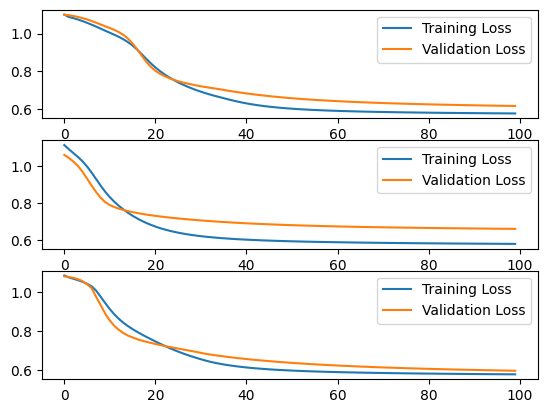

In [208]:

for i in range(len(train_losses_list)):
    plt.subplot(3, 1, i+1)
    plt.plot(range(num_epochs), train_losses_list[i], label='Training Loss')
    plt.plot(range(num_epochs), validate_losses_list[i], label='Validation Loss')
    plt.legend()


In [209]:
model_ensemble = models.ModelEnsemble(models_list, test_dataloader)
print(model_ensemble.ensemble_output)
print(model_ensemble.labels)
print(len(test_dataloader))

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])
tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])
6


In [210]:
print(len(model_ensemble.model_outputs))

3


In [211]:
correct, total, total_predictions, total_labels, total_outputs = evaluate_model.test_model(model, test_dataloader)

In [212]:
# Save our NN Model
torch.save(model.state_dict(), 'simple_neural_network.pt')
     

In [213]:
# Load the Saved Model
new_model = models.Model()
new_model.load_state_dict(torch.load('simple_neural_network.pt'))

<All keys matched successfully>

In [214]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)